In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.qaoa.models.MaxCutProblem import MaxCutProblem

def visualize(data, x,y, hues, chart):
    fig = plt.figure(figsize=(9,6))
    match chart:
        case 'line':
            chart_type = sns.lineplot
        case 'bar':
            chart_type = sns.barplot
        case 'box':
            chart_type = sns.boxplot

    # make a copy to avoid modifying the original DataFrame and avoid warnings
    data_to_plot = data.copy()

    try:
        if len(hues) > 1:
            data_to_plot['hues'] = data_to_plot[hues].astype(str).agg('-'.join, axis=1)
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}')
        elif len(hues) == 1:
            data_to_plot['hues'] = data_to_plot[hues[0]]
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}')
        else:
            _ = chart_type(data=data_to_plot, x=x, y=y)
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}')
            #plt.show()

            plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

        plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
        plt.show()
        plt.close(fig)
    except (KeyError, ValueError) as e:
        print(f"You've passed an incorrect column name.\n The correct ones are: \n{data_to_plot.columns}\nException: {e}")


### Configure the results you want to visualize under.

#### Pick multiple hues with ctrl or shift + click.
#### The "Exclude bad" removes the warm started hamming distances of >0 from the dataset.


In [59]:
import ast
import numpy as np


"""strings = ["results/results_papergraph_depth_{2, 10}_vertexcover_50RI.csv",
           "results/results_papergraph_depth_{2, 10}MaxCut_50RI.csv",
           "results/results_papergraph_depth_{2, 4, 6, 8, 10}.csv",
           "results/results_papergraph_depth_{2, 10}.csv"]"""
strings = [ #these are the 5,7,9 runs, i think. 
    "results/results_papergraph_depth_{1, 2, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'gaussian', 'static'}_depth_{1, 2, 10, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'gaussian', 'static'}_depth_{1, 2, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'static', 'gaussian'}_depth_{1, 2, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'static', 'gaussian'}_warm_start_{False, True}.csv",
    "results/results_papergraph_warm_start_{False, True}.csv",
    "results/results_papergraph_depth_{1, 2}_warm_start_{False, True}.csv",
    "results/results_papergraph_.csv"
]
strings = [
    "results/results_papergraph_qaoa_variant_{'multiangle', 'vanilla'}_depth_{2, 4, 6, 8, 10}.csv",
    "results/results_papergraph_depth_{2, 4, 6, 8, 10}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{2, 4, 6}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{8, 10}_hamming_dist_{2, 4, 6}.csv"
]
strings = ["results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 4}, 'warm_start'_ {False, True}, 'vertexcover'_ {True}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 4}, 'warm_start'_ {True}, 'vertexcover'_ {True}, 'hamming_dist'_ {2, 4, 6}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {7}, 'warm_start'_ {False, True}, 'vertexcover'_ {True}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'vanilla'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 10, 4, 7}, 'warm_start'_ {False, True}, 'vertexcover'_ {True}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'vanilla'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 10, 4, 7}, 'warm_start'_ {True}, 'vertexcover'_ {True}, 'hamming_dist'_ {2, 4,.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {7}, 'warm_start'_ {True}, 'problem_type'_ {'minvertexcover'}, 'hamming_dist'_ .csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {10}, 'warm_start'_ {False, True}, 'problem_type'_ {'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {10}, 'warm_start'_ {True}, 'problem_type'_ {'minvertexcover'}, 'hamming_dist'_.csv"]

for file in strings:
    try:
        df = pd.read_csv(file)
        #print(f"File: {file}")
        #print(df['graph_name'].value_counts())
        #print("\n")
    except FileNotFoundError:
        print(f"File not found: {file}")

if len(strings) >1:
    results = pd.concat([pd.read_csv(path,index_col=0) for path in strings])

else:
    results = pd.read_csv(strings[0])





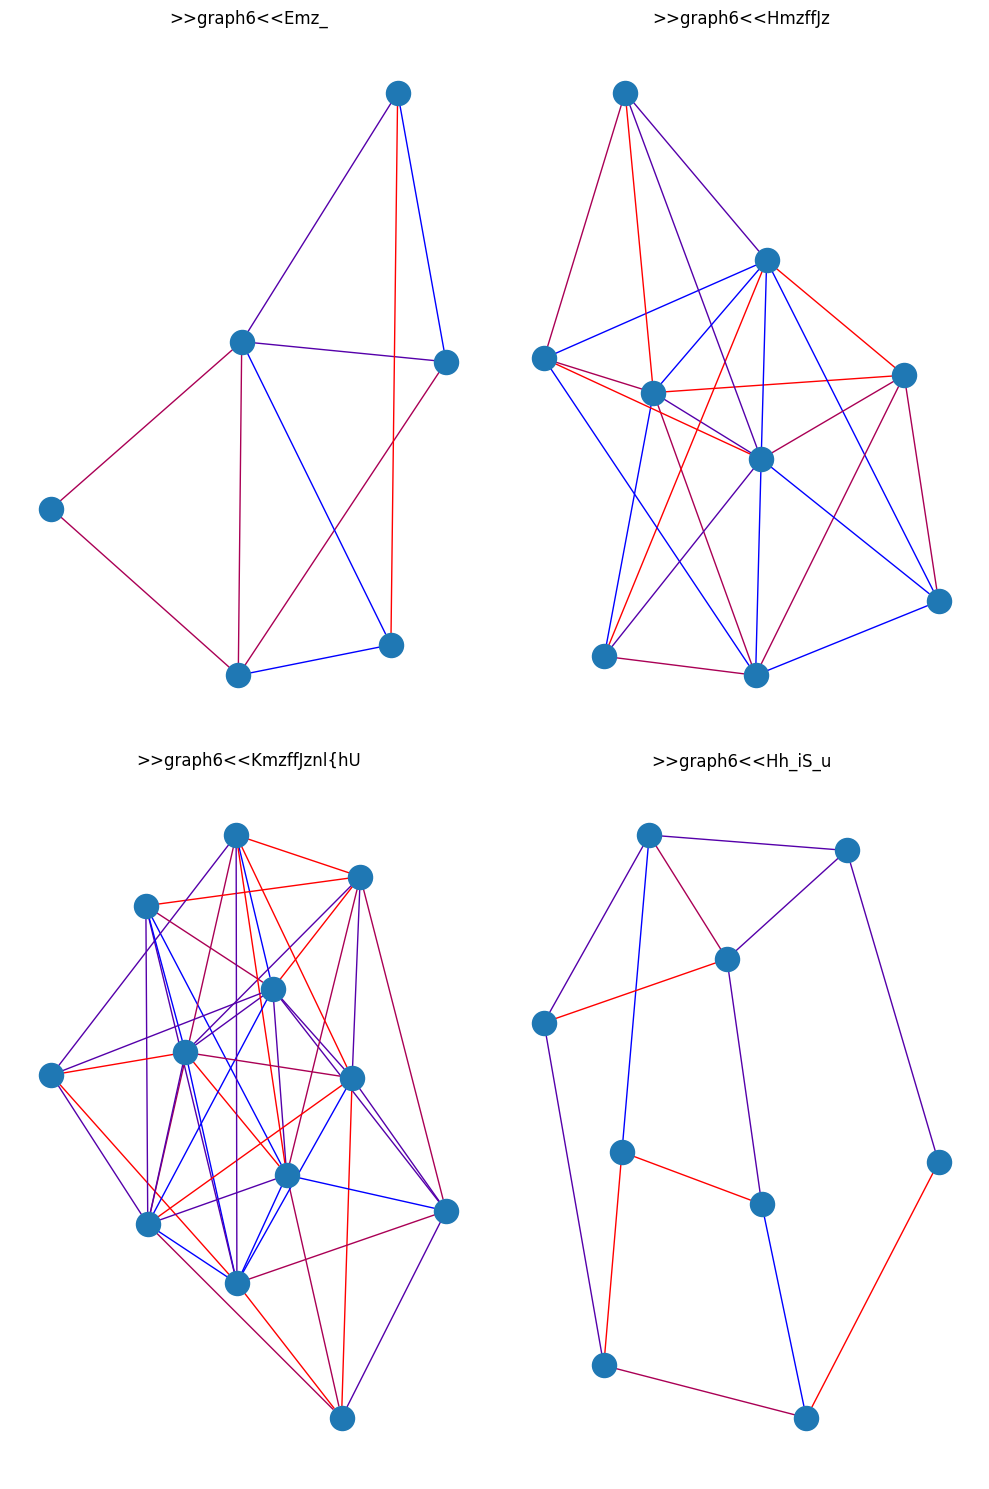

In [56]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
import networkx as nx
from rustworkx.visualization import mpl_draw as draw_graph_func


# set up problem and graphs
problem = MaxCutProblem()
graphs = problem.get_erdos_renyi_graphs_paper1()

# create a simple blue→red colormap
cmap = LinearSegmentedColormap.from_list("blue_red", ["blue", "red"])

fig, axs = plt.subplots(2, 2, figsize=(10, 15))
axs = axs.flatten()

for i, g in enumerate(graphs):
    ax = axs[i]

    # get (u, v, weight) triples
    weighted_edges = g.weighted_edge_list()
    weights = [w for _, _, w in weighted_edges]

    # normalize weights to [0,1]
    norm = Normalize(vmin=min(weights), vmax=max(weights))

    # map each weight to an RGB(A) from blue→red
    edge_colors = [cmap(norm(w)) for _, _, w in weighted_edges]

    # draw with the per-edge colours
    draw_graph_func(
        g,
        ax=ax,
        with_labels=False,
        edge_color=edge_colors,
    )

    # title with graph6 string
    graph = nx.Graph(list(g.edge_list()))
    graph6_string = nx.to_graph6_bytes(graph).decode("utf-8").strip()
    ax.set_title(graph6_string)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [57]:
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

# --- configure your controls ---
graph_names = ['All'] + results['graph_name'].unique().tolist()
y_options   = ['ratio', 'time_elapsed', 'quantum_func_evals', 'percent_measure_optimal']
x_options = ['qaoa_variant', 'depth','hamming_dist', 'warm_start','lagrangian_multiplier']
hue_options = ['qaoa_variant', 'depth','hamming_dist', 'warm_start','lagrangian_multiplier']
chart_types = ['bar', 'line', 'box']
ws_options = [False, True]




@interact(
    graph_name=widgets.Dropdown(
        options=graph_names, 
        description='Graph:'
    ),
    x=widgets.Dropdown(
        options = x_options,
        description = 'X axis'
    ),
    y=widgets.Dropdown(
        options=y_options, 
        description='Y axis:'
    ),
    hues=widgets.SelectMultiple(
        options=hue_options, 
        description='Hues:'
    ),
    chart=widgets.Dropdown(
        options=chart_types, 
        description='Chart:'
    ),
    exclude_warmstart=widgets.Dropdown(
        options = ws_options,
        description= 'Exclude Bad Warmstarts'
    )
)
def update_visualization(graph_name, x, y, hues, chart, exclude_warmstart):
    # filter the DataFrame
    
    if graph_name != 'All':
        df = results[results['graph_name'] == graph_name]
    else:
        df = results.copy()
    if exclude_warmstart:
        df = df[~(df['hamming_dist']>0)]
    # call your existing visualize() helper
    visualize(df, x=x,y=y, hues=list(hues), chart=chart)




interactive(children=(Dropdown(description='Graph:', options=('All', '>>graph6<<Emz_', '>>graph6<<HmzffJz', '>…